In [2]:
import pandas as pd
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
neg = normal(-8,5,1000)
pos = normal(3,5,1000)

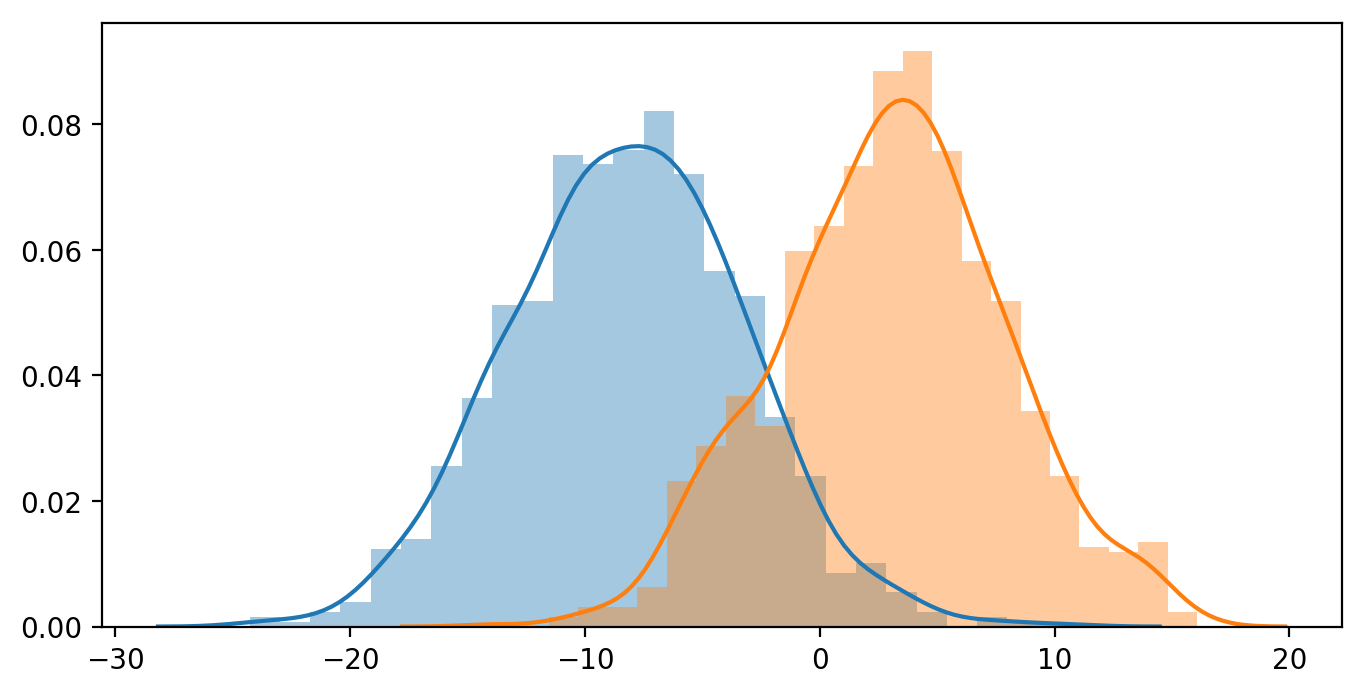

In [4]:
plt.figure(figsize=(8,4), dpi=200)
sns.distplot(a=neg)
sns.distplot(a=pos)

In [5]:
df1 = pd.DataFrame({'x': neg, 'class': 'neg'})
df2 = pd.DataFrame({'x': pos, 'class': 'pos'})
df = df1.append(df2)

In [6]:
df_sorted = df.sort_values('x', ascending=False)

In [7]:
def toClass(b, t=0.5):
    return('pos' if b>=t else 'neg')

In [8]:
n = len(df_sorted)
cp = sum(df_sorted['class'] == 'pos')
cn = sum(df_sorted['class'] == 'neg')
X = [0] # store results for plotting
Y = [0] # " " "
AUC = 0.0
lastfpr = 0.0
maxACC = 0.0
bestThreshold = 0
bestX = 0.0
bestY = 0.0
for threshold in df_sorted['x']:
    out = df_sorted['x'].apply(toClass, t=threshold)
    tp = sum((df_sorted['class'] == 'pos') & (out == 'pos'))
    tn = sum((df_sorted['class'] == 'neg') & (out == 'neg'))
    fp = sum((df_sorted['class'] == 'neg') & (out == 'pos'))
    fn = sum((df_sorted['class'] == 'pos') & (out == 'neg'))
    tpr = tp / cp # recall
    fpr = fp / cn # fallout
    acc = (tp + tn) / n
    if acc > maxACC:
        maxACC = acc
        bestThreshold = threshold
        bestX = fpr
        bestY = tpr
    X.extend([fpr])
    Y.extend([tpr])
    #print("t=%.2f: TP=%d, TN=%d, FP=%d, FN=%d, TPR=%.2f, FPR=%.2f" % (threshold, tp, tn, fp, fn, tpr, fpr))
    AUC = AUC + ((fpr-lastfpr)*tpr)
    lastfpr = fpr
X.extend([1])
Y.extend([1])
print("AUC: %.2f" % AUC)
print("Best Accuracy = %.2f at t = %.2f" % (maxACC, bestThreshold))
print("Best x,y: {:.1f},{:.1f}".format(bestX, bestY))

AUC: 0.95
Best Accuracy = 0.88 at t = -1.71
Best x,y: 0.1,0.8


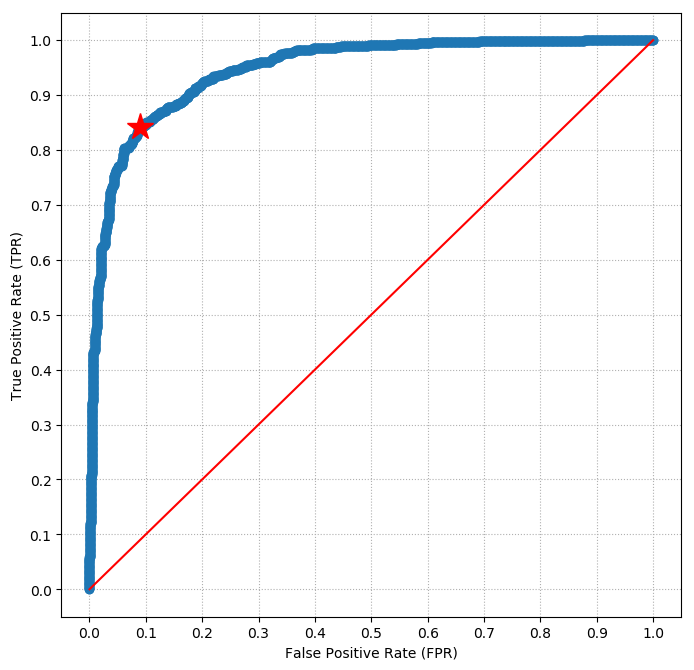

In [9]:
plt.figure(figsize=(8,8), dpi=100)
plt.plot(X, Y, marker='o')
plt.plot([0,1], [0,1], c='red') # red reference line
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(linestyle='dotted')
plt.axis(xmin=-0.05, xmax=1.05, ymin=-0.05, ymax=1.05)
plt.plot(bestX, bestY, 'r*', markersize=20)
plt.show()